Needs the Pandeia package + dependancies

based on scripts provided by Nora Luetzgendorf

In [1]:
import sys 
sys.path.append('../')
from nirspec_sn import NIRSpec_SN
from astropy.io import ascii
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

In [2]:
spec = ascii.read('../data/kilnova_orig_50Mpc_p+10.25.txt')
'../data/'
spec = spec.to_pandas()

wave = spec['wave_micron'].values
flux = spec['flux_mjy'].values

<IPython.core.display.Javascript object>


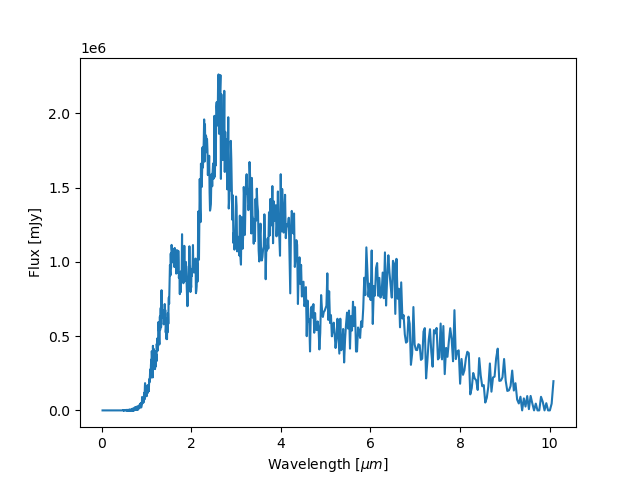

Text(0.5, 0, 'Wavelength [$\\mu m$]')

In [3]:
plt.figure()
plt.plot(wave,flux)
plt.ylabel('Flux [mJy]')
plt.xlabel('Wavelength [$\mu m$]')

In [4]:
test = NIRSpec_SN(ref_wave=.4)
test.wave = wave
test.flux = flux
test.mag = 26

#test.filter='f070lp'

In [5]:
test.Calculate_SN(1000)

(6.366654772290885, 1050.40008)

In [11]:
t = test.Calculate_exposure_for_SN(5,verbose=True)
print(str(t) + ' s')

Optimal mode: nrsirs2rapid
exposure time: 816.97784
816.97784 s


In [10]:
test.Calculate_SN(t)

(5.662506740643749, 875.3334)

# test extinction

In [5]:
orig = NIRSpec_SN(ref_wave=.4)
orig.wave = wave
orig.flux = flux
orig.mag = 26

red = NIRSpec_SN(ref_wave=.4)
red.wave = wave
red.flux = flux
red.mag = 26
red.Redden_spec(av=3)

<IPython.core.display.Javascript object>


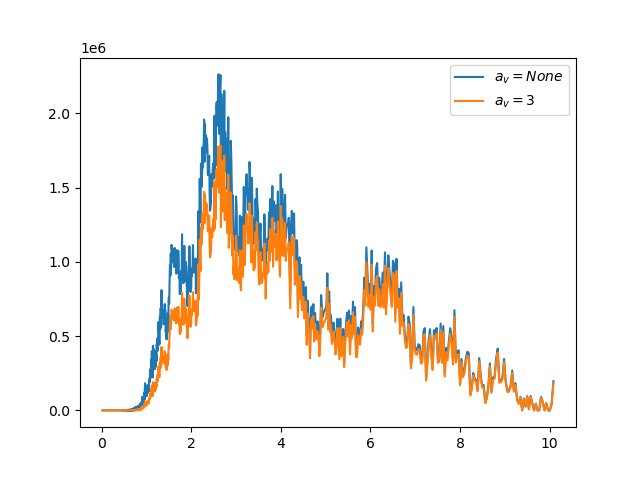

In [9]:
plt.figure()
plt.plot(orig.wave,orig.flux,label='$a_v={}$'.format(orig.av))
plt.plot(red.wave,red.flux,label='$a_v={}$'.format(red.av))
plt.legend()


# test redshift

In [19]:
orig = NIRSpec_SN(ref_wave=2)
orig.wave = wave
orig.flux = flux
orig.mag = 26

reds = NIRSpec_SN(ref_wave=2,z=1)
reds.wave = wave
reds.flux = flux
reds.mag = 26
reds.Distance_scale()

dist = NIRSpec_SN(ref_wave=2,dist=500)
dist.wave = wave
dist.flux = flux
dist.mag = 26
dist.Distance_scale()

<IPython.core.display.Javascript object>


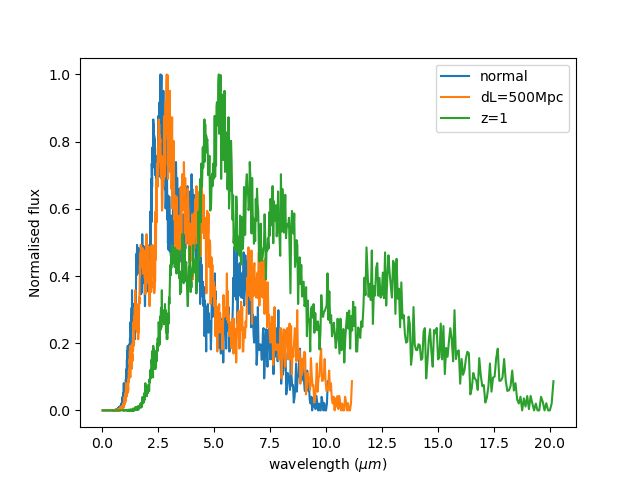

In [18]:
plt.figure()
plt.plot(orig.wave,orig.flux/np.nanmax(orig.flux),label='normal')
plt.plot(dist.wave,dist.flux/np.nanmax(dist.flux),label='dL=500Mpc')
plt.plot(reds.wave,reds.flux/np.nanmax(reds.flux),label='z=1')

plt.legend()

plt.ylabel('Normalised flux')
plt.xlabel(r'wavelength ($\mu m$)');